<a href="https://colab.research.google.com/github/juyeonyoon/RecSys_Cordi/blob/master/%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/비타민 컨퍼런스/"

musinsa = pd.read_csv(path+"musinsa_data.csv")
print(musinsa.shape)
musinsa.head()

(65551, 25)


,Unnamed: 0,name,main_category,sub_category,brand,number,tags,price,rating,rating_num,...,coordi,age18,age19_23,age24_28,age29_33,age34_39,age40,man,woman,img
0,0,NM2DN51A_빅샷,가방,백팩,THE NORTH FACE,NM2DN51A,"['가방', '데이팩', '백팩', '빅샷', '신학기백팩', '캠핑']","150,000원",4.9,15173.0,...,"['스트릿', '스포츠', '캐주얼']",32%,27%,21%,10%,3%,7%,60%,40%,https://image.msscdn.net/images/goods_img/2019...
1,1,THINK PACK,가방,백팩,YALE,YB1BG0031BK0,"['백팩', '노트북백팩', '백팩추천', '데일리백', '코듀라', '로고', '...","119,000원",4.9,3184.0,...,['캐주얼'],41%,27%,16%,5%,2%,9%,43%,57%,https://image.msscdn.net/images/goods_img/2021...
2,2,메쉬 스트링 백팩 블랙,가방,백팩,NEIKIDNIS,NBP005-101,"['메쉬스트링백팩', '스트링백팩', 'MESHSTRINGBACKPACK', '코듀...","69,000원",4.9,3733.0,...,['캐주얼'],42%,25%,16%,5%,2%,10%,44%,56%,https://image.msscdn.net/images/goods_img/2020...
3,3,앱솔루트 백팩 블랙,가방,백팩,NEIKIDNIS,037ASB06,"['백팩', '앱솔루트', '학생가방', '코듀라', '포켓', '노트북', '커플...","94,000원",4.8,12697.0,...,['캐주얼'],44%,18%,16%,8%,3%,11%,48%,52%,https://image.msscdn.net/images/goods_img/2017...
4,4,슈퍼브레이크 BLACK,가방,백팩,JANSPORT,JS0A4QUT008,"['슈퍼브레이크', '백팩', '가방', '데일리', '여행', '아웃도어', '포켓']","49,000원",4.8,3823.0,...,['캐주얼'],41%,28%,15%,6%,3%,7%,23%,77%,https://image.msscdn.net/images/goods_img/2020...


In [ ]:
musinsa = musinsa.iloc[:,1:]

In [ ]:
musinsa.columns

Index(['name', 'main_category', 'sub_category', 'brand', 'number', 'tags',
       'price', 'rating', 'rating_num', 'season', 'gender', 'like', 'view',
       'sale', 'coordi', 'age18', 'age19_23', 'age24_28', 'age29_33',
       'age34_39', 'age40', 'man', 'woman', 'img'],
      dtype='object')

무신사 column에는 이름, 상위 카테고리, 하위 카테고리, 브랜드, 품번, 태그, 가격, 평점, 평점 수, 시즌, 성별, 좋아요 수, 조회수, 판매 수, 코디, 나이별 판매율, 성별 판매율, 이미지 url이 있다. 

1. 한 상품 골랐을 때 이와 유사한 상품 추천 - 컨텐츠 기반
> - 유사도 측정: main_category, sub_category, brand, tags(TF-IDF), price, season, gender, coordi(TF-IDF), age_, man/woman

2. 다양한 필터를 입력 하면 걸러내는 방식으로 점수 매겨서 top N개 추천 
> - user정보 또는 contents data: season, gender, age_, man, woman  
> - 필터: main_category, sub_category, brand, price, coordi,,
> - TF-IDF: tags, coordi 
> - 점수화: rating, rating_num, like, view

3. user 정보를 가지고 있지 X 
> - item based or contents based
> - item based 상품의 개수 한정적일때 좋은 효과를 보임 -> 좋을까,,?
> - 가장 좋은건 다양한 알고리즘 섞는 것일텐데 유저 정보가 없어서 추천 알고리즘 선정에 한계가 있을듯

##1. main_category / sub_category

In [ ]:
musinsa["main_category"].unique()

array(['가방', '여성 가방', '스포츠/용품', '모자', '상의', '스니커즈', '스커트', '신발', '아우터',
       '원피스', '바지', '하의'], dtype=object)

In [ ]:
musinsa["sub_category"].unique()

array(['백팩', '캐리어', '가방 소품', '지갑/머니클립', '클러치 백', '메신저/크로스 백', '크로스백',
       '숄더백', '토트백', '에코백', '스포츠가방', '웨이스트 백', '파우치 백', '브리프케이스',
       '캡/야구 모자', '스포츠모자', '헌팅캡/베레모', '페도라', '버킷/사파리햇', '비니', '기타 모자',
       '트루퍼', '반소매 티셔츠', '긴소매 티셔츠', '민소매 티셔츠', '셔츠/블라우스', '맨투맨/스웨트셔츠',
       '후드 티셔츠', '니트/스웨터', '기타 상의', '피케/카라 티셔츠', '캔버스/단화', '패션스니커즈화',
       '기타 스니커즈', '롱스커트', '미니스커트', '미디스커트', '구두', '부츠', '스포츠잡화', '신발 용품',
       '로퍼', '힐/펌프스', '플랫 슈즈', '블로퍼', '샌들', '슬리퍼', '기타 신발', '스포츠신발',
       '모카신/보트 슈즈', '환절기 코트', '겨울 싱글 코트', '겨울 더블 코트', '겨울 기타 코트',
       '롱패딩/롱헤비 아우터', '숏패딩/숏헤비 아우터', '\x08패딩베스트', '베스트', '사파리/헌팅 재킷',
       '나일론/코치  재킷', '기타 아우터', '후드 집업', '블루종/MA-1', '레더/라이더스 재킷', '무스탕/퍼',
       '트러커 재킷', '슈트/블레이저 재킷', '아우터', '카디건', '아노락 재킷', '플리스/뽀글이',
       '트레이닝 재킷', '스타디움 재킷', '맥시 원피스', '미니원피스', '미디원피스', '기타 바지', '데님 팬츠',
       '레깅스', '숏 팬츠', '슈트 팬츠/슬랙스', '점프 슈트/오버올', '코튼 팬츠', '트레이닝/조거 팬츠'],
      dtype=object)

main_category에 스포츠/용품 column은 크롤링 할때 상위 카테고리 하나 더 추가 된 것으로, 주변 값과 동일하게 맞춰주어야 한다.(sub_category도 바꿔주어야 한다.) 

여기서 주의할 점이 기존 musinsa_data를 보면 모든 data가 뒤로 하나씩 밀린것을 볼 수 있다. 

ex) 가방 > 보스턴/드럼/더플백 
=> 이 경우 무신사에 스포츠/용품 > 스포츠가방 > "보스턴/드럼/더플백" 이렇게 나와 첫번째와 두번째 정보를 크롤링 했기 때문에 main_category가 스포츠가방이 나와야하는데 스포츠/용품이 크롤링되고 sub_category에는 보스턴/드럼/더플백이 아니라 스포츠가방이 크롤링 된다. 이걸 확인해 바꿔주어야 한다. 

In [ ]:
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠/용품'].index[:616],["main_category","sub_category"]] = ["스포츠가방","보스턴/드럼/더플백"]

In [ ]:
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠/용품'].index[:424],["main_category","sub_category"]] = ["스포츠모자", "선캡/바이저"]

In [ ]:
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠/용품'].index[:84],["main_category","sub_category"]] = ["스포츠잡화", "신발용품"]

In [ ]:
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠/용품'].index[:145],["main_category","sub_category"]] = ["스포츠신발", "워터스포츠화"]

나머지는 아우터로 확인해보니 스포츠/용품이 상위 카테고리고 하위 카테고리는 다른 상품의 카테고리와 동일 하지만 지금 카테고리가 아우터에서 가디건인지 아노락 재킷인지.. 등 구분하기가 어려움 이 부분은 결측값으로 바꿔준 다음 fillna를 통해 (method="ffill
") 앞에 있는 데이터 값과 동일하게 채워준다. 

In [ ]:
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠/용품'].index,["main_category","sub_category"]] = np.NaN

In [ ]:
#결측값 위의 값으로 채워준다.
musinsa["main_category"].fillna(method="ffill", inplace=True)
musinsa["sub_category"].fillna(method="ffill", inplace=True)

In [ ]:
musinsa["main_category"].unique() 

array(['가방', '여성 가방', '스포츠가방', '모자', '스포츠모자', '상의', '스니커즈', '스커트', '신발',
       '스포츠잡화', '스포츠신발', '아우터', '원피스', '바지', '하의'], dtype=object)

1. 스포츠 가방, 스포츠 모자, 스포츠 신발.. 가방, 모자, 신발로 통일하는게 좋을지 생각 -> 스포츠는 통일하는게 좋을듯 나누는 항목이 스포츠가 아니니까

2. 여성 가방과 가방 분류하는 거 확인 해 보니 gender가 ["여"]인건 여성 가방 나머지는 다 가방으로 분류 -> 다 통일

3. 하의에 레깅스 바지 종류는 다 바지로 되어있다. 크롤링 할때 레깅스 바지로 분류되어있었다. 상의가 있으니 바지 + 레깅스(하의)를 하의로 통일시킨다. 

In [ ]:
#스포츠가방을 가방으로 변환
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠가방'].index,"main_category"] = "가방"
#스포츠모자를 모자로 변환
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠모자'].index,"main_category"] = "모자"

#잡화는 보류
#스포츠신발을 신발로 변환
musinsa.loc[musinsa[musinsa["main_category"] == '스포츠신발'].index,"main_category"] = "신발"

#여성가방 가방으로 변환
musinsa.loc[musinsa[musinsa["main_category"] == '여성 가방'].index,"main_category"] = "가방"

#바지를 하의로 변환
musinsa.loc[musinsa[musinsa["main_category"] == '바지'].index,"main_category"] = "하의"

In [ ]:
musinsa["main_category"].unique() 

array(['가방', '모자', '상의', '스니커즈', '스커트', '신발', '스포츠잡화', '아우터', '원피스', '하의'],
      dtype=object)

In [ ]:
musinsa["sub_category"].unique()

array(['백팩', '캐리어', '가방 소품', '지갑/머니클립', '클러치 백', '메신저/크로스 백', '크로스백',
       '숄더백', '토트백', '에코백', '보스턴/드럼/더플백', '웨이스트 백', '파우치 백', '브리프케이스',
       '캡/야구 모자', '선캡/바이저', '헌팅캡/베레모', '페도라', '버킷/사파리햇', '비니', '기타 모자',
       '트루퍼', '반소매 티셔츠', '긴소매 티셔츠', '민소매 티셔츠', '셔츠/블라우스', '맨투맨/스웨트셔츠',
       '후드 티셔츠', '니트/스웨터', '기타 상의', '피케/카라 티셔츠', '캔버스/단화', '패션스니커즈화',
       '기타 스니커즈', '롱스커트', '미니스커트', '미디스커트', '구두', '부츠', '신발용품', '신발 용품',
       '로퍼', '힐/펌프스', '플랫 슈즈', '블로퍼', '샌들', '슬리퍼', '기타 신발', '워터스포츠화',
       '모카신/보트 슈즈', '환절기 코트', '겨울 싱글 코트', '겨울 더블 코트', '겨울 기타 코트',
       '롱패딩/롱헤비 아우터', '숏패딩/숏헤비 아우터', '\x08패딩베스트', '베스트', '사파리/헌팅 재킷',
       '나일론/코치  재킷', '기타 아우터', '후드 집업', '블루종/MA-1', '레더/라이더스 재킷', '무스탕/퍼',
       '트러커 재킷', '슈트/블레이저 재킷', '카디건', '아노락 재킷', '플리스/뽀글이', '트레이닝 재킷',
       '스타디움 재킷', '맥시 원피스', '미니원피스', '미디원피스', '기타 바지', '데님 팬츠', '레깅스',
       '숏 팬츠', '슈트 팬츠/슬랙스', '점프 슈트/오버올', '코튼 팬츠', '트레이닝/조거 팬츠'],
      dtype=object)

In [ ]:
#패딩베스트 값 이상 앞에 바꿔주기
import re
musinsa["sub_category"] = [re.sub(r'[\x08]','', s) for s in musinsa["sub_category"]]

##2. tags

tag 종류 살펴보기

In [ ]:
import ast

a = []
num_na = 0

for i in musinsa["tags"]:
    li = ast.literal_eval(i)
    for j in li:
        a.append(j)
    if len(li) == 0:
        num_na += 1

In [ ]:
print(len(a))
print(len(list(set(a))))
print(num_na)

309230
15910
12253


고유 태그 15910개, 빈 결측값([ ]) 12253개 

1. 고유 태그는 TF-IDF로 점수 매기면 되지 않을까
2. 빈 결측값 어떻게 할 것인지 생각

##3. rating & rating_num

In [ ]:
#rating

musinsa["rating"].isnull().sum()

13519

13519개 결측값 존재한다. 0으로 채워준다. 

In [ ]:
musinsa["rating"].fillna(0, inplace=True)

In [ ]:
musinsa["rating"].describe() 

count    65551.000000
mean         3.782228
std          1.945133
min          0.000000
25%          4.300000
50%          4.800000
75%          4.900000
max          5.000000
Name: rating, dtype: float64

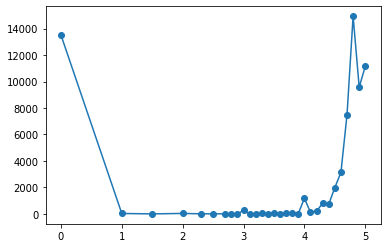

In [ ]:
import matplotlib.pyplot as plt

rating = musinsa["rating"].value_counts().reset_index()
rating.sort_values(by="index", inplace=True)
plt.plot(rating["index"], rating["rating"], marker="o")

In [ ]:
rating

,index,rating
1,0.0,13519
18,1.0,34
28,1.5,2
16,2.0,39
23,2.3,8
22,2.5,10
24,2.7,4
26,2.8,3
25,2.9,4
10,3.0,270


In [ ]:
#rating_num

musinsa["rating_num"].isnull().sum()

13519

rating_num도 rating 마찬가지로 결측값 13519개 존재한다. 0으로 바꿔준다. 

In [ ]:
musinsa["rating_num"].fillna(0, inplace=True)

In [ ]:
musinsa["rating_num"].describe()

count     65551.000000
mean       1181.221904
std        7700.905955
min           0.000000
25%           1.000000
50%          14.000000
75%         127.000000
max      159414.000000
Name: rating_num, dtype: float64

리뷰 평점과, 리뷰 개수를 잘 조율해서 (곱한다거나, 퍼센트 매겨서 곱하거나 이런식,,가중치) 값을 도출한다. 리뷰 개수가 많을 수록 리뷰 평점의 신뢰도가 높아진다고 생각할수 있기 때문에 

-> 일단, rating과 rating_num과의 관계를 알아보자

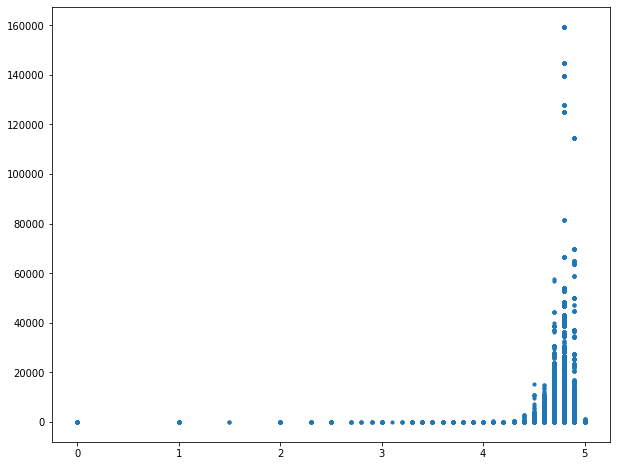

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = musinsa["rating"], y = musinsa["rating_num"], s=10)

rating이 낮은 상품들은 다 적은 리뷰수를 기록하고 있다. 높은 상품들 중에 리뷰수가 적은 것도 있다. 리뷰수가 많은 상품이 평점이 높다면 좋은 상품일 확률이 높지만 리뷰수가 적은데 평점이 높은 건 전 상품보다 좋다고 확신할 수 없다. 

###rating&rating_num 이용해 새로운 컬럼 만들기 

In [ ]:
musinsa[["rating", "rating_num"]].head(20)

,rating,rating_num
0,4.9,15173.0
1,4.9,3184.0
2,4.9,3733.0
3,4.8,12697.0
4,4.8,3823.0
5,4.9,2936.0
6,4.9,3299.0
7,4.8,6487.0
8,4.9,2869.0
9,4.9,4317.0


####1. 직접 생각해본 계산

1. 가중치 생성 rating_num의 모든 숫자가 0~10으로 생성되게 스케일링 해준다. 
2. new_rating = scale_rating_num * rating

In [ ]:
weight = (musinsa["rating_num"]/musinsa["rating_num"].max())*10
new_rating = weight * musinsa["rating"]
new_rating[:20]

0     4.663812
1     0.978684
2     1.147434
3     3.823102
4     1.151116
5     0.902455
6     1.014033
7     1.953254
8     0.881861
9     1.326941
10    1.489185
11    0.513982
12    0.453160
13    0.524998
14    0.549814
15    0.472129
16    0.959320
17    0.930119
18    0.156147
19    1.118597
dtype: float64

####2. 인터넷 searching 
출처: https://chan-chance.tistory.com/22

In [ ]:
# 가중평균
def weighted_average(musinsa):
    r=musinsa['rating_num']
    R=musinsa['rating']
    return ( (r/(r+m)*R) ) + ( (m/(m+r)*M)  )

# 적용
M=np.round(musinsa['rating'].mean(),4)
m=musinsa['rating_num'].quantile(0.5)
new_rating = musinsa.apply(weighted_average,axis=1)
new_rating[:20]

0     4.898970
1     4.895107
2     4.895824
3     4.798879
4     4.796286
5     4.894695
6     4.895276
7     4.797808
8     4.894572
9     4.896387
10    4.697463
11    4.791720
12    4.790619
13    4.890912
14    4.792256
15    4.790993
16    4.895008
17    4.894852
18    4.870021
19    4.796179
dtype: float64

##4. season

In [ ]:
musinsa["season"].isnull().sum()

9066

season은 결측값 대체하기 어렵다. 그냥 그대로 진행

ALL은 전체 S/S: Spring/Summer의 약자로 봄/여름 시즌을 의미하고, F/W: Fall/Winter 약자이다. 

In [ ]:
musinsa["season"].unique()

array(['2021 ALL', '2022 ALL', nan, '2020 ALL', '2021 S/S', '2019 ALL',
       '병행수입', '2022 S/S', 'ALL ALL', '2022', '2017 ALL', '2020 S/S',
       '2018 ALL', '2021 F/W', '2022 F/W', 'ALL', '2020 F/W', '2020',
       '2016 ALL', '2018 F/W', '2015 ALL', '2017 S/S', '2019 F/W',
       'ALL S/S', 'ALL F/W', '2019 S/S', '2018 S/S', '2016 F/W',
       '2017 F/W', '2020 SPECIAL', '2023 S/S', '2016 S/S'], dtype=object)

In [ ]:
musinsa[musinsa["season"].isnull()]["main_category"].value_counts()

가방       2300
아우터      1992
하의       1220
신발       1079
상의       1050
모자        693
스니커즈      376
스커트       258
원피스        93
스포츠잡화       5
Name: main_category, dtype: int64

1. ALL ALL 과 그냥 ALL 차이 
2. ALL과 년도 ALL의 차이 

In [ ]:
musinsa["season"].value_counts()

2022 S/S        12984
2021 F/W        10466
2021 ALL         8265
2022 ALL         7421
2021 S/S         4884
2020 ALL         3857
2020 F/W         2806
2020 S/S         1416
2019 ALL          893
ALL ALL           792
2018 ALL          456
2019 F/W          422
ALL               382
ALL F/W           350
ALL S/S           290
병행수입              280
2018 F/W          112
2017 ALL          101
2022 F/W           94
2016 ALL           78
2019 S/S           75
2018 S/S           13
2016 F/W           13
2022               12
2017 F/W           12
2017 S/S            5
2020                2
2023 S/S            1
2015 ALL            1
2020 SPECIAL        1
2016 S/S            1
Name: season, dtype: int64

확실히 최근 시즌 제품들 제일 많다. 시즌이 많이 지난 제품들은 아마 전체 품목이 크롤링 된 경우의 상품일 것이라 생각된다. 상의나 하의품목 등은 상품수가 많아 10페이지까지 끌어모으면 리뷰수도 많고, 최신 상품들이 많이 끌어와지지만, 적은 상품을 가지고 있는 품목들은 10페이지도 안돼 모든 상품이 끌어모아졌다. 

##5. gender

In [ ]:
musinsa["gender"].isnull().sum()

0

In [ ]:
musinsa["gender"].unique()

array(["['남', '여']", "['남']", "['여']", "['라이프']", "['남', '아동']",
       "['남', '여', '아동']", "['남', '여', '라이프']", "['여', '아동']"],
      dtype=object)

gender에는 "남", "여", "라이프", "아동" 이 있다. 

##6. like

In [ ]:
musinsa["like"].isnull().sum()

0

In [ ]:
musinsa["like"]  #dtype가 object -> int로 바꿔준다. 

0        35,679
1        23,982
2        20,481
3        27,844
4        15,322
          ...  
65546       700
65547       328
65548       752
65549       268
65550       347
Name: like, Length: 65551, dtype: object

In [ ]:
musinsa["like"] = musinsa["like"].str.replace(',', '').astype(int)
musinsa["like"].describe()

count     65551.000000
mean        915.027871
std        3564.787429
min           0.000000
25%          41.000000
50%         164.000000
75%         553.000000
max      191825.000000
Name: like, dtype: float64

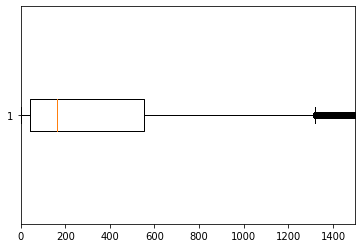

In [ ]:
plt.boxplot(musinsa["like"], vert=0)
plt.xlim([0, 1500]) 
plt.show()

한쪽으로 엄청 치우쳐져 있다. 

좋아요 수와, 평점에도 관련이 있을지 확인해본다. 

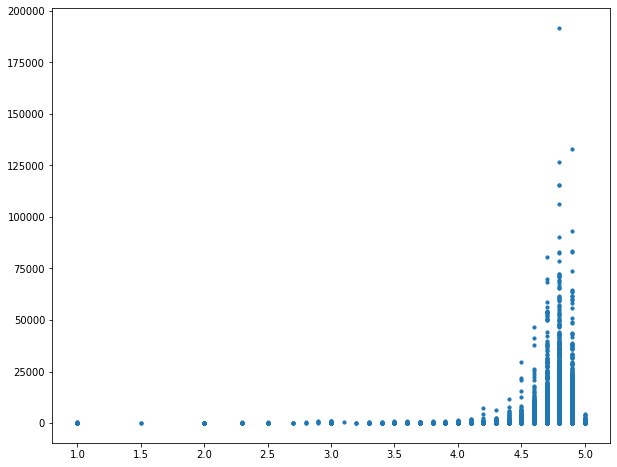

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = musinsa["rating"], y = musinsa["like"], s=10)

평점이 낮은건 좋아요 개수가 낮다는 것을 알 수 있지만, 좋아요 수는 직접 구매한 후기 평점과는 차이가 있다. 따로 보는게 좋을듯? 좋아요 수는 유행 또는 인기 상품일 가능성 

##7. view

In [ ]:
musinsa["view"]

0         40000
1        260000
2        160000
3        110000
4        160000
          ...  
65546       800
65547     14000
65548     28000
65549       700
65550       400
Name: view, Length: 65551, dtype: int64

텍스트값으로 되어있으므로, 숫자로 바꿔준다. 기본값을 숫자 값 이상이라고 생각한다.

In [ ]:
musinsa["view"] = musinsa["view"].str.replace('만 회 이상', '0000').str.replace('천 회 이상', '000').str.replace("회 이상", '')

In [ ]:
#결측값 0으로 
musinsa["view"].fillna('0', inplace=True)

In [ ]:
musinsa["view"] = musinsa["view"].str.replace('.', '').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
musinsa["view"].describe()

count    6.555100e+04
mean     1.375162e+04
std      7.403555e+04
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+02
75%      1.200000e+04
max      6.070000e+06
Name: view, dtype: float64

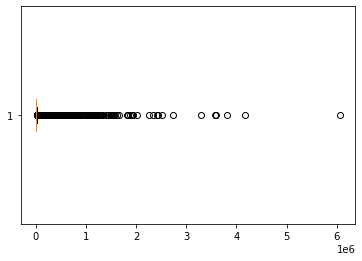

In [ ]:
plt.boxplot(musinsa["view"], vert=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


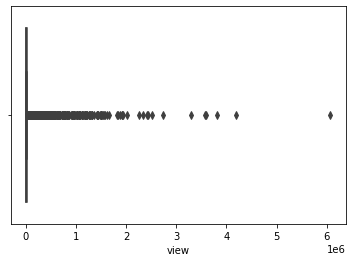

In [ ]:
import seaborn as sns

sns.boxplot(musinsa["view"])

##8. sale

sale도 like와 동일한 방식으로 전처리 진행한다. sale은 50개 미만이 있다. 그 부분 0이상으로 처리 한다. 

In [ ]:
musinsa["sale"] = musinsa["sale"].str.replace("만 개 이상", "0000").str.replace("천 개 이상", "000").str.replace("개 이상","").str.replace("50개 미만", "0")

In [ ]:
musinsa["sale"].fillna('0', inplace=True) 

In [ ]:
musinsa["sale"] = musinsa["sale"].str.replace('.', '').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
musinsa["sale"].describe()

count    6.555100e+04
mean     2.659790e+03
std      2.584396e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+02
max      2.420000e+06
Name: sale, dtype: float64

##9. coordi

In [ ]:
a = []
num_na = 0

for i in musinsa["coordi"]:
    try:
        li = ast.literal_eval(i)
        for j in li:
            a.append(j)
    except:
        num_na += 1

In [ ]:
print(len(a))
print(len(list(set(a))))
print(num_na)

27901
12
44945


코디 고유값 12개: ("아메리칸 캐주얼", "캐주얼", "시크", "댄디", "포멀", "걸리시", "골프", "홈웨어", "레트로", "로맨틱", "스포츠", "스트릿")

44945가 결측값이다. 

1. 코디도 태그와 마찬가지고 TF-IDF로 점수 매긴다. 
2. 결측값 대체할건지 그냥 진행할건지